# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


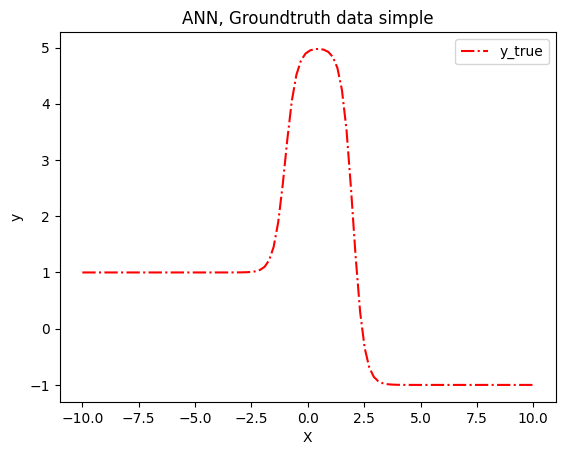

In [14]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [15]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

OK


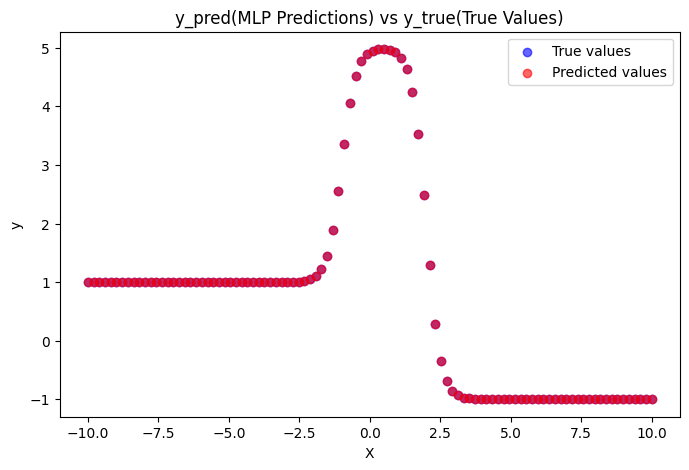

Weights: [array([[ 1.99955364, -1.99982277]]), array([[-3.00025468],
       [-2.00028831]])]
Biases: [array([-3.99887199, -1.99975169]), array([9.50319692e-06])]


In [16]:
# TODO: plot the fit..
plt.figure(figsize=(8,5))
plt.scatter(X, y_true, label="True values", color='blue', alpha=0.6)
plt.scatter(X, y_pred, label="Predicted values", color='red', alpha=0.6)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("y_pred(MLP Predictions) vs y_true(True Values)")
plt.show()

# Weights and biases
weights = mlp.coefs_  # Weight matrices list
biases = mlp.intercepts_  # Bias vectors list

# Parameters
print("Weights:", weights)
print("Biases:", biases)

#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [17]:
# TODO: extract and print all coefficients..

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [18]:
# TODO: create formula..

# Extracting weights and biases
weights_input_hidden = mlp.coefs_[0] # weights
weights_hidden_output = mlp.coefs_[1] # weights

biases_hidden = mlp.intercepts_[0] # biases
bias_output = mlp.intercepts_[1][0] # biases

#print values
print("Weights (Input to hidden):",weights_input_hidden)
print("Weights (Hidden to output):",weights_hidden_output)
print("Biases (Hidden):",biases_hidden)
print("Biases (Output):",bias_output)


Weights (Input to hidden): [[ 1.99955364 -1.99982277]]
Weights (Hidden to output): [[-3.00025468]
 [-2.00028831]]
Biases (Hidden): [-3.99887199 -1.99975169]
Biases (Output): 9.503196923440804e-06


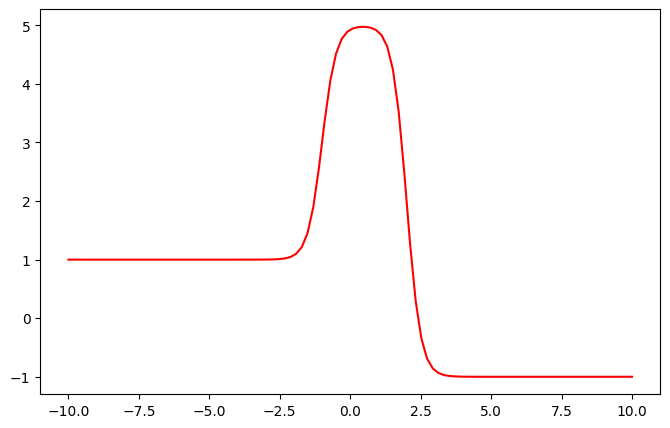

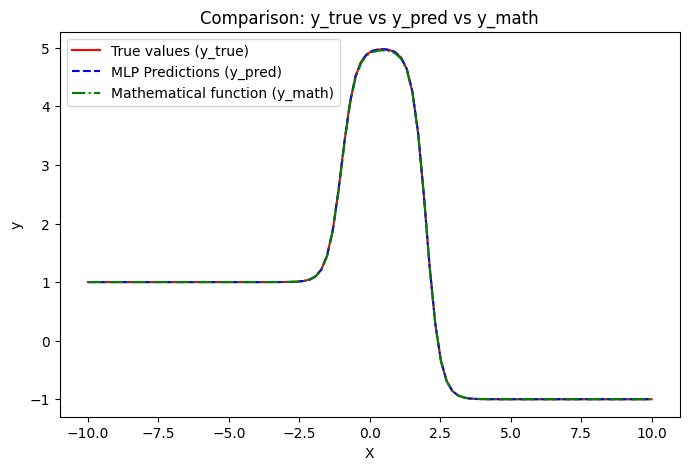

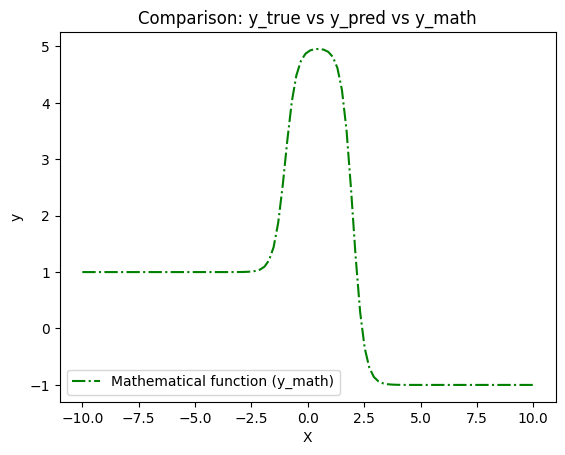

In [23]:

import numpy as np

w_1= -2
w_2 = 2
b_1 = 4
b_2 = 1.99
w_3 = 2.99
w_4= 1.99
b_3 = -0.00005
def y_math(x):
    return w_3*np.tanh(w_1*x + b_1) + w_4*np.tanh(w_2*x + b_2) + b_3

y_math_values = np.array([y_math(x) for x in X]).flatten()

# Plot the comparison
plt.figure(figsize=(8,5))
plt.plot(X, y_true, "r-", label="True values (y_true)")

def y_math(x):
    return w_3*np.tanh(w_1*x + b_1) + w_4*np.tanh(w_2*x + b_2) + b_3

y_math_values = np.array([y_math(x) for x in X]).flatten()

# Plot the comparison
plt.figure(figsize=(8,5))
plt.plot(X, y_true, "r-", label="True values (y_true)")
plt.plot(X, y_pred, "b--", label="MLP Predictions (y_pred)")
plt.plot(X, y_math_values, "g-.", label="Mathematical function (y_math)")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison: y_true vs y_pred vs y_math")
plt.show()
plt.plot(X, y_math_values, "g-.", label="Mathematical function (y_math)")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison: y_true vs y_pred vs y_math")
plt.show()

#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

In [24]:
# TODO: plot the formula..

#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

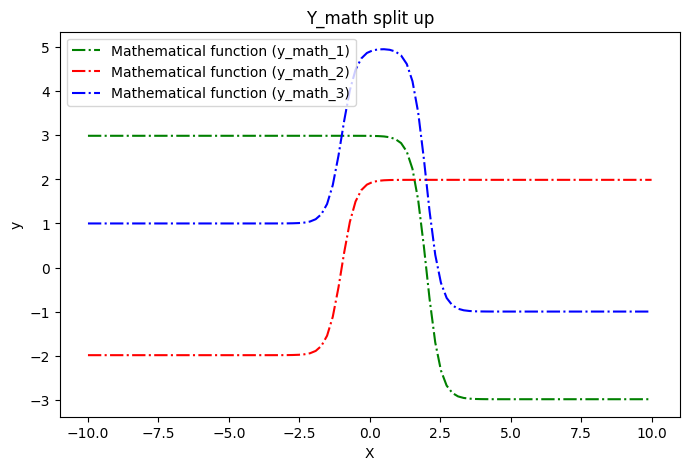

In [25]:
# TODO: plot the first and second half of the formula..


def y_math_1(x):
    return w_3*np.tanh(w_1*x + b_1) 

def y_math_2(x):
    return w_4*np.tanh(w_2*x + b_2) + b_3

def y_math_3(x):
    return y_math_2(x) + y_math_1(x)

y_math_values_1 = np.array([y_math_1(x) for x in X]).flatten()
y_math_values_2 = np.array([y_math_2(x) for x in X]).flatten()
y_math_values_3 = np.array([y_math_3(x) for x in X]).flatten()

# Plot
plt.figure(figsize=(8,5))
plt.plot(X, y_math_values_1, "g-.", label="Mathematical function (y_math_1)")
plt.plot(X, y_math_values_2, "r-.", label="Mathematical function (y_math_2)")
plt.plot(X, y_math_values_3, "b-.", label="Mathematical function (y_math_3)")


plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Y_math split up")
plt.show()

#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

Text(0.5, 1.0, 'ANN, Groundtruth data for Sinc')

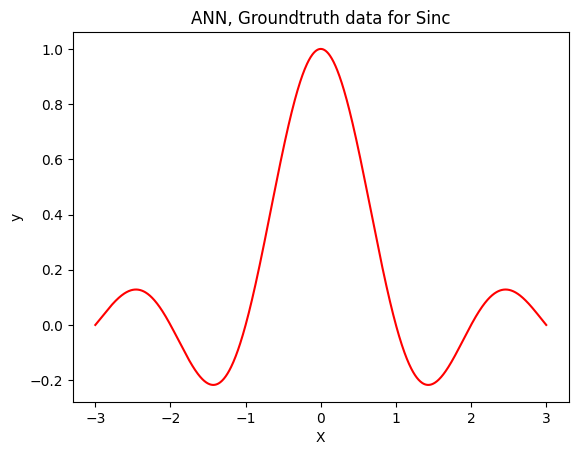

In [28]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")


OK


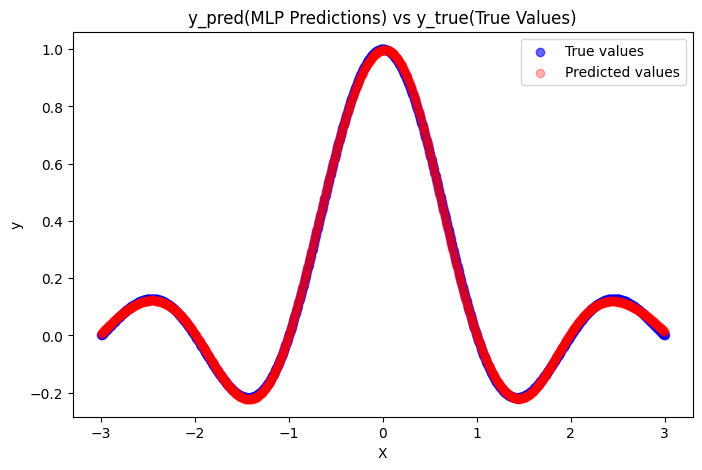

In [31]:

# TODO:
#assert False, "TODO: instantiate and train an MLP on the sinc data.."

mlp_sinc = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [20], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp_sinc.fit(X, y_true)
y_pred = mlp_sinc.predict(X)

print("OK")

plt.figure(figsize=(8,5))
plt.scatter(X, y_true, label="True values", color='blue', alpha=0.6)
plt.scatter(X, y_pred, label="Predicted values", color='red', alpha=0.3)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("y_pred(MLP Predictions) vs y_true(True Values)")
plt.show()



####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [32]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.